Saving sample_IMDB_movies.csv to sample_IMDB_movies (1).csv


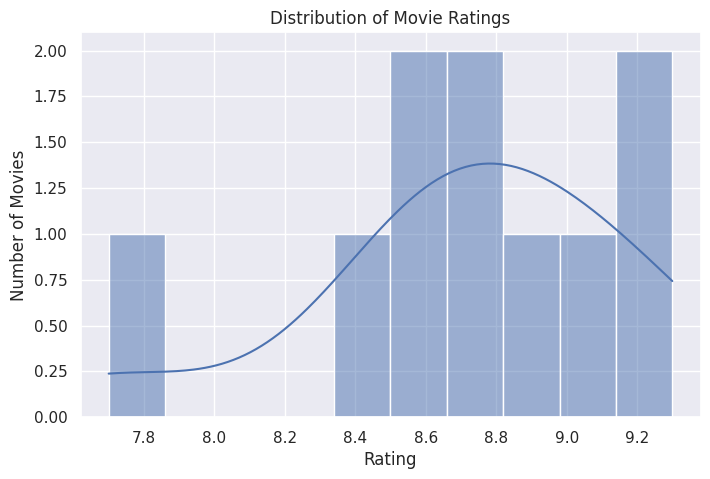

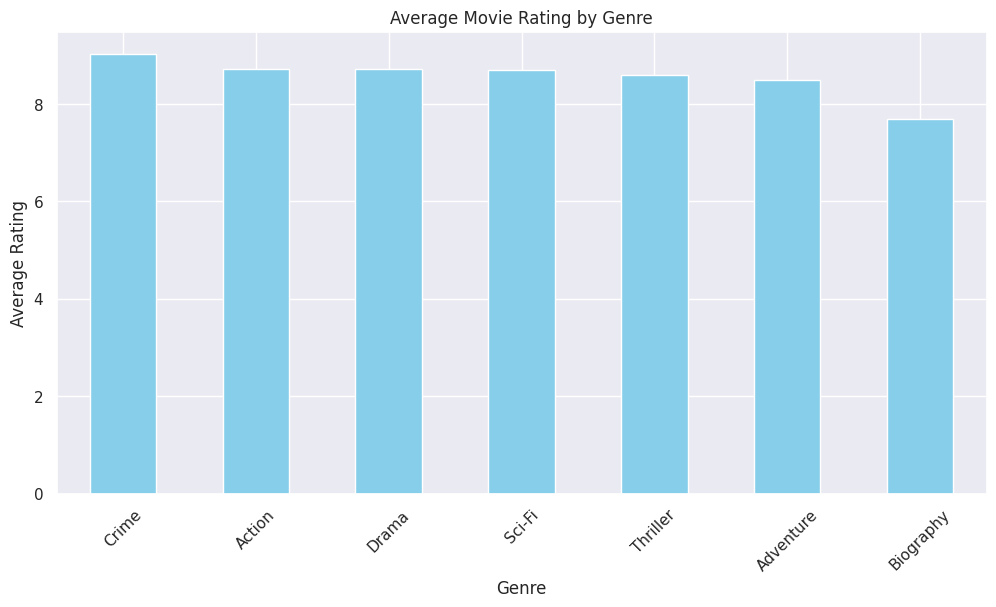

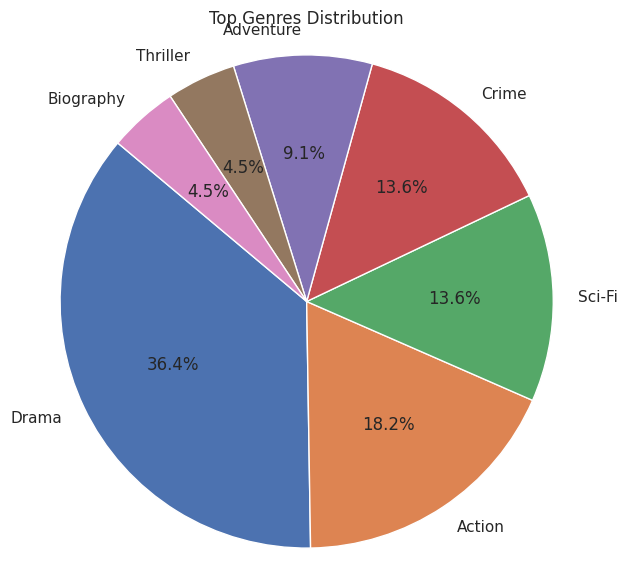

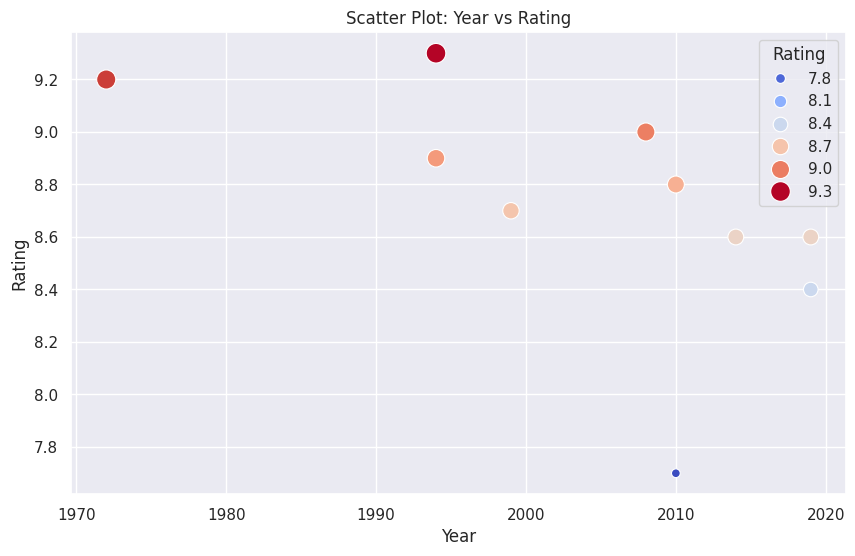

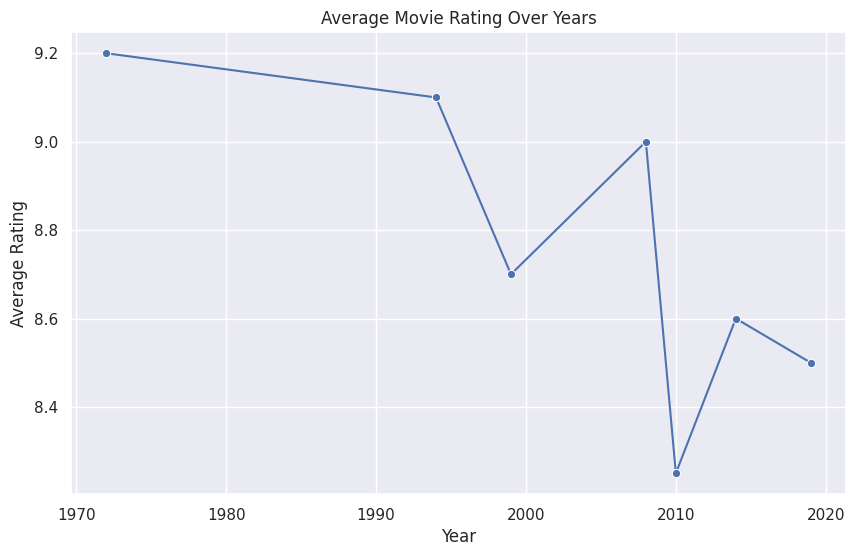

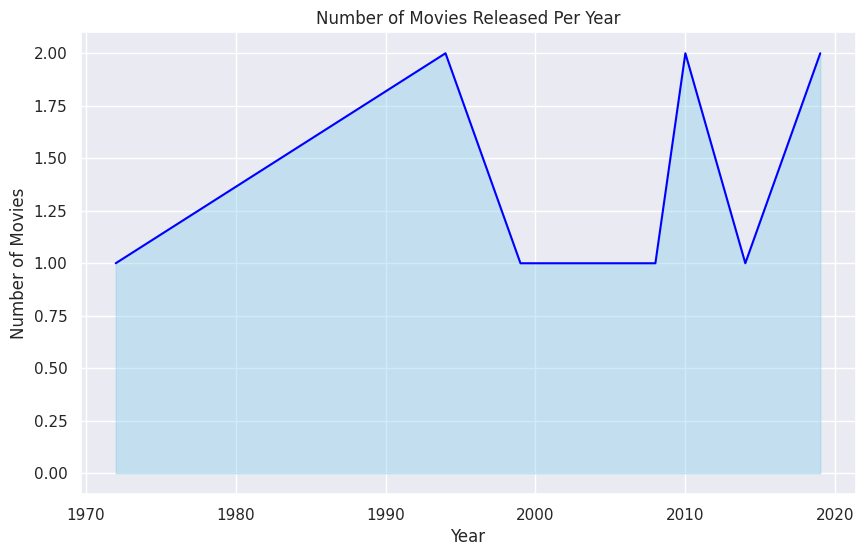

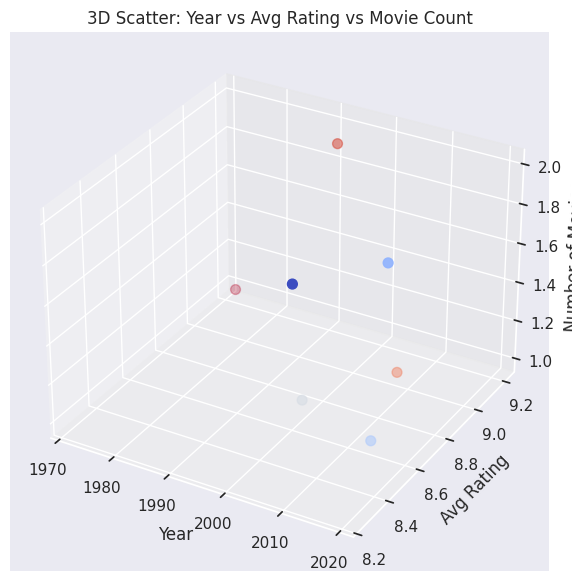

In [ ]:
# Movie Rating Analysis

# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# Set plot style
sns.set(style="darkgrid")

# Upload your dataset
uploaded = files.upload()

# Load dataset (replace with your filename if needed)
df = pd.read_csv('sample_IMDB_movies.csv')

# Data Cleaning and Preparation
df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Genre'] = df['Genre'].str.split(',')

# Explode genres for genre-wise analysis
df_genres = df.explode('Genre')
df_genres['Genre'] = df_genres['Genre'].str.strip()


# Visualization Section

# Histogram of Ratings
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

# Bar Plot – Average Rating by Genre
genre_rating = df_genres.groupby('Genre')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
genre_rating.plot(kind='bar', color='skyblue')
plt.title('Average Movie Rating by Genre')
plt.ylabel('Average Rating')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()

# Pie Chart – Top Genres Distribution
genre_counts = df_genres['Genre'].value_counts().head(8)
plt.figure(figsize=(7,7))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Genres Distribution')
plt.axis('equal')
plt.show()

# Scatter Plot – Year vs Rating
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Year', y='Rating', hue='Rating', palette='coolwarm', size='Rating', sizes=(40, 200))
plt.title('Scatter Plot: Year vs Rating')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.show()

# Line Plot – Average Rating Over Years
avg_rating_per_year = df.groupby('Year')['Rating'].mean()
plt.figure(figsize=(10,6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker='o')
plt.title('Average Movie Rating Over Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

# Area Chart – Number of Movies Per Year
movies_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.fill_between(movies_per_year.index, movies_per_year.values, color='skyblue', alpha=0.4)
plt.plot(movies_per_year.index, movies_per_year.values, color='blue')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# 3D Plot – Year vs Rating vs Number of Movies
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
year_counts = df['Year'].value_counts().sort_index()
years = year_counts.index
movie_counts = year_counts.values
avg_ratings = df.groupby('Year')['Rating'].mean().loc[years].values

ax.scatter(years, avg_ratings, movie_counts, c=avg_ratings, cmap='coolwarm', s=50)
ax.set_xlabel('Year')
ax.set_ylabel('Avg Rating')
ax.set_zlabel('Number of Movies')
ax.set_title('3D Scatter: Year vs Avg Rating vs Movie Count')
plt.show()